<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>

Кирилл, доброго дня! рад приветствовать тебя! <br />
<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы ты мог использовать его для своего дальнейшего успеха) И очень здорово будет, если тебе удастся задавать вопросы, да и вообще - всячески доставать меня, если я по каким-то причинам не приму проект:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<br> Я сразу же начал общаться на ты:) но если это не очень удобно, то дай знать)) <BR> В ПУТЬ!<br>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Цель проекта: <a class = "tocSkip"> 
Построить модель прогнозирования потенциального оттока клиентов из банка в ближайшее время. 
    
## Задачи проекта: <a class = "tocSkip"> 
- подготовить данные к работе;
- заменить категориальные признаки на числовые;
- обучить несколько моделей, выбрать из них лучшую;
- исследовать баланс классов;
- исправить дисбаланс;
- проверить качество модели, максимизируя значения метрик (f1-score не менее 0.59)

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.utils import shuffle
from catboost import CatBoostClassifier #для дополнительного анализа
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/datasets/Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>ОК, данные на базе)

In [5]:
#Приведём названия всех столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [6]:
df['exited'].value_counts(normalize=True).round(3)

0    0.796
1    0.204
Name: exited, dtype: float64

Для анализа предоставлен набор данных, состоящий из 14 столбцов и 10000 записей. В таблице имеются данные как количественные, так и категориальные, для построения модели будет необходимо обработать категориальные данные.  
В столбце tenure имеются пропуски в объёме 9% от общего числа записей.  
Значения целевого признака несбалансированы, при настройке модели и расчёте метрик необходимо это учитывать.  
Будем считать, что из имеющихся столбцов столбцы ***rownumber, customerid, surname*** не оказывают влияние на целевой признак, поэтому исключим их при построении модели.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>план понятен)

Обработаем имеющиеся пропуски.

In [7]:
df.isna().sum()

rownumber            0
customerid           0
surname              0
creditscore          0
geography            0
gender               0
age                  0
tenure             909
balance              0
numofproducts        0
hascrcard            0
isactivemember       0
estimatedsalary      0
exited               0
dtype: int64

In [8]:
is_one = round((df.query('tenure.isna() & exited == 1')['exited'].count()) /  (df.query('exited == 1')['exited'].count()), 3)
is_null = round((df.query('tenure.isna() & exited == 0')['exited'].count()) /  (df.query('exited == 0')['exited'].count()), 3)
is_one, \
is_null

(0.09, 0.091)

Как видим пропуски в столбце tenure распределены равномерно для значений в столбцу exited. Предполагаем, что количество лет, что человек является клиентом банка оказывает определённое влияние на целевой признак, поэтому не будем удалять строки с пропусками, вместо этого заменим их нулями.

In [9]:
#df['tenure'].fillna(value=0,inplace=True)
df.dropna(subset=['tenure'], inplace=True)
df.isna().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>
решение понятно, но обоснования ему нет, кроме предположения( Почему именно так решили заполнить? как это повлияет на результат моделирования? <br>
<br> Возможно, что групповая (например по географии) медиана также не принесла бы большой ошибки. А может взять и удалить, чтобы не "искушаться"..Тут понятно, что однозначного решения нет, как и алгоритма. Правило только одно (как в медицине) - НЕ нарведи. Т.е. принимаемое решение должно соотноситься с возможным ущербом на конечный результат. В нашем случае ущерб от медианного заполнения ниже от ущерба удалить данные?. Причём выше/ниже - это только на чуйке/жизенном опыте смого аналитика.<br>
Интересная это работа - быть DS-аналитиком)<br><br>
    
В данном случае, спарведливости ради, если построить распределение ДО и ПОСЛЕ заполнения пропусков, то увидим, что оно изменится. Т.е. данный подход несколько исказит инфо, а значит и результат моделирования будет уже не очень.<br> Тут лучшим способом будет - заполнение случайным числом.<br>
    
Ещё вараинт:<br> удалить пропущенные строки. А по окнчании построения модели, вывести важность факторов самой модели. И если фактор tenure окажется не значим, то как в принципе удалить его из моделирования, а первоначально удалённые строки - вернуть.

<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>

Скорее всего и правда лучше удалить пустые строки, в конце проверял значимость признаком, tenure далеко не самый важный.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u>
<font color='green'><br>ок)

In [10]:
print("В исследуемых данных имеется", df.duplicated().sum(),"дубликатов")

В исследуемых данных имеется 0 дубликатов


## Исследование задачи

Целевой признак - факт ухода клиента, представляет собой столбец с бинарными данными, где 0 - клиент остался, 1 - клиент ушёл. Следовательно, для предсказания оттока клиентов необходимо создать модель классификации.   
Для построения модели необходимо преобразовать категориальные значения в таблице. 
Также для адекватного построения модели необходимо учесть дисбаланс классов: разброс значений в столбцах balance и estimatedsalary значительно больше, чем в остальных числовых столбцах.

In [11]:
# Удалим столбцы, которые не будут использоваться для построения модели.
df2 = df.drop(['rownumber', 'customerid', 'surname'], axis=1) 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>
категорическию.... соглаен с дропом)

In [12]:
# Применим OHE для столбцов geography и gender.
df_ohe = pd.get_dummies(df2, drop_first=True)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='red'><br>
при ohe - образуются лишние столбцы. Поэтому вставляют специальный параметр в функцию, которая решают эту проблемку. Посмотри, пожалуйста, этот момент)

<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>  
    
Не совсем понял тему с дамми-ловушкой, а точнее смысл понятен для бинарного признака, такого как пол, но как лучше всего поступать с признаками, где больше двух значений? В нашем случае это страны. Мне почему-то кажется что для них не нужно отбрасывать столбец, или я ошибаюсь?

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u>
<font color='green'><br>Один столбец - всегда отбрасывается. Это такой метод. Например, возьмём фактор пол: 0 - это мужчины, а 1 - женщины. У нас один стообец - а описали 2 состояния пола. ОК. Возьмём географию - есть 3 состояния фактора. И тут кодируется так: 2 столбца появились - Германия и Испания. Рассмотрим по строкам: Германия =0, Испания=1 - тут понятно в модели будет работать Испния. Если Германия =1, а Испания=0 - В модели будет работать Германия. А если Германия=Испания=0, то в этотой строке, по умолчанию Франция = 1. Т.е. в модели будет работать Франция. Итого, у нас есть 3 состояния фаткора, значит нам достаточно будет только 2-х столбцов. В общем-то это и есть правило: столбцов дамми-переменных на один меньше, чем состояний фактора.

In [13]:
df_ohe.columns

Index(['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited', 'geography_Germany',
       'geography_Spain', 'gender_Male'],
      dtype='object')

In [14]:
#Разделим данные на обучающую, валидационную и тестовую выборки.
features = df_ohe.drop('exited', axis=1) 
target = df_ohe['exited']

features_train, features_test, target_train, target_test \
    = train_test_split(features, target, test_size=0.2, random_state=1)

features_train, features_val, target_train, target_val \
    = train_test_split(features_train, target_train, test_size=0.25, random_state=1)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
ОК, хорошо, здесь можно ещё проконтролировать размер новых выборок. Например командой shape

<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>  
    
В прошлом проекте при разбивке выборки использовал "stratify" в train_test_split, можно ли это также отчасти считать способом борьбы с дисбалансом. Не будет ли при этом метрики по всем полученным выборкам наиболее приближенными друг к другу?

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u>
<font color='green'><br>
Возможно, что где-то это может сработать) Но лучше, на мой взгляд, использовать балансировку по классике, через методы балансировки.

In [15]:
#Проведём стандартизацию численных признаков
numeric = ['creditscore', 'age', 'tenure', 'balance', 'estimatedsalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_val[numeric]= scaler.transform(features_val[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
features_train.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
6042,0.798034,-0.939767,-1.376723,1.132231,1,1,1,1.272883,0,0,0
6739,-1.474609,1.554295,1.041298,0.903032,2,1,1,1.218531,0,0,1
6704,-2.235632,0.595040,-0.685860,0.452336,2,1,1,1.447673,1,0,1
5199,1.371407,-1.131618,-0.685860,-1.224215,2,1,0,0.753540,0,1,0
8421,0.443585,0.403189,0.350435,0.844742,1,1,0,-1.111411,0,0,1


In [16]:
features_train.shape, features_test.shape, features_val.shape

((5454, 11), (1819, 11), (1818, 11))

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
ОК, понятно)

<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>  
    
Можешь пояснить по поводу масштабирования признаков: мы можем масштабировать всем числовые параметры сразу, или я правильно сделал, что бинарные не стал масштабировать?

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u>
<font color='green'><br>Да, масштабирование - только для числовых. Бинарные и номинальные - не стоит.

## Логистическая регрессия <a class = "tocSkip">

In [17]:
# Подберём значения гиперпараметром

clf = LogisticRegression(random_state=1, solver='liblinear')

param_dict_logistic = {
    "C": [0.01, 0.1, 0.5, 1, 5, 10],
    "max_iter": range(10,1000, 50)}
    
grid = GridSearchCV(clf, param_grid=param_dict_logistic, cv=5, verbose=1, n_jobs=-1)
grid.fit(features_train, target_train)

grid.best_params_, \
grid.best_estimator_, \
grid.best_score_

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.9min finished


({'C': 0.5, 'max_iter': 10},
 LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=10,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False),
 0.810964429776311)

In [18]:
# Построим модель, используя алгоритм случайного леса
logistic_model = LogisticRegression(random_state=1, solver='liblinear', C=0.5, max_iter=10)
logistic_model.fit(features_train, target_train)
predicted_val_logistic = logistic_model.predict(features_val)
print(classification_report(target_val, predicted_val_logistic))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1438
           1       0.55      0.23      0.33       380

    accuracy                           0.80      1818
   macro avg       0.69      0.59      0.60      1818
weighted avg       0.77      0.80      0.77      1818



## Случайный лес <a class = "tocSkip">

In [19]:
# Подберём значения гиперпараметром
clf = RandomForestClassifier(random_state=1)

param_dict = {
    "n_estimators":range(1,100,10),
    "max_depth":range(1,20),
    "min_samples_split":range(2,5),
    "min_samples_leaf":range(1,5)
}

grid = GridSearchCV(clf, param_grid=param_dict, cv=3, verbose=1,n_jobs=-1)
grid.fit(features_train, target_train)

grid.best_params_, \
grid.best_estimator_, \
grid.best_score_

Fitting 3 folds for each of 2280 candidates, totalling 6840 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 6840 out of 6840 | elapsed: 26.0min finished


({'max_depth': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 41},
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=10, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=41,
                        n_jobs=None, oob_score=False, random_state=1, verbose=0,
                        warm_start=False),
 0.8624862486248625)

In [20]:
# Построим модель, используя алгоритм случайного леса
forest_model = RandomForestClassifier(random_state=1, max_depth=10, n_estimators=41, min_samples_leaf=1, min_samples_split=2)
forest_model.fit(features_train, target_train)
predicted_val_forest = forest_model.predict(features_val)
print(classification_report(target_val, predicted_val_forest))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1438
           1       0.79      0.49      0.61       380

    accuracy                           0.87      1818
   macro avg       0.84      0.73      0.76      1818
weighted avg       0.86      0.87      0.85      1818



In [21]:
# Проверка моделей на адекватность
dummy_clf = DummyClassifier(strategy="uniform", random_state=1)
dummy_clf.fit(features_train, target_train)
dummy_predicts = dummy_clf.predict(features_test)
print(classification_report(target_test, dummy_predicts))

              precision    recall  f1-score   support

           0       0.81      0.51      0.63      1463
           1       0.20      0.51      0.29       356

    accuracy                           0.51      1819
   macro avg       0.51      0.51      0.46      1819
weighted avg       0.69      0.51      0.56      1819



Лучше всего себя показал алгортим на основе случайного леса. На тестовой выборке удалось достичь следующих значений метрик: accuracy - 0.87, f1-score - 0.61. Данная модель показывает результат лучше, чем модель на основе логичтисеской регрессии, также модель прошла проверку на адекватность - работает лучше, чем случайная модель.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
стратегия 'most_frequent', мне кажется будет точнее..

<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>  
    
Сначала тоже использовал "most_frequent", но тогда формируется выборка без 1, я хотел сделать случайную выборку чуть ближе к исходным данным для эффективной настройки модели.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u>
<font color='green'><br>понял.

## Борьба с дисбалансом

В исследуемых данных имеется сильный дисбаланс в значениях целевого признака. Необходимо его устранить.
В качестве алгоритма для обучения используем Случайный лес.

In [22]:
target_train.value_counts()

0    4336
1    1118
Name: exited, dtype: int64

In [23]:
# построим модель с учтём сбалансированного взвешивания классов
model = RandomForestClassifier(random_state=1, max_depth=10, n_estimators=41, min_samples_leaf=1, min_samples_split=2,  class_weight = 'balanced')
model.fit(features_train, target_train)
predicted_val = forest_model.predict(features_val)
f1_score(target_val, predicted_val)

0.6058631921824104

Взвешивания класса недосточно для достижения желаемого значения метрики f1-score - 0.59

В целевом признаке отрицательных значений в 4 раза больше, чем положительных, что и создаёт дисбаланс. Применим технику upsampling для борьбы с дисбалансом данных.

In [24]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=1)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model = RandomForestClassifier(random_state=1, max_depth=10, n_estimators=41, min_samples_leaf=1, min_samples_split=2)
model.fit(features_upsampled, target_upsampled)
predicted_val = model.predict(features_val)
f1_score(target_val, predicted_val)

0.6161137440758294

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>ОК, балансируем именно трайн.

In [25]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=1)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=1)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=1)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.3)

model = RandomForestClassifier(random_state=1, max_depth=10, n_estimators=41, min_samples_leaf=1, min_samples_split=2)
model.fit(features_downsampled, target_downsampled)
predicted_val = model.predict(features_val)
f1_score(target_val, predicted_val)

0.6061899679829242

Были проверены несколько способов обработки дисбаланса, лучший результат метрики f1-score показывает upsampling. Будем использовать его для проверки модели на тестовой выборке.

## Тестирование модели

In [26]:
#Объединим обучающую и валидационную выборки
features_train_final = pd.concat([features_train, features_val])
features_train_final.reset_index(drop=True, inplace= True)
target_train_final = pd.concat([target_train, target_val])
target_train_final.reset_index(drop=True, inplace= True)
features_train_final.shape, target_train_final.shape

((7272, 11), (7272,))

In [27]:
features_upsampled, target_upsampled = upsample(features_train_final, target_train_final, 3)

model = RandomForestClassifier(random_state=1, max_depth=10, n_estimators=41, min_samples_leaf=1, min_samples_split=2)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
f1_score(target_test, predicted_test)

0.6032171581769437

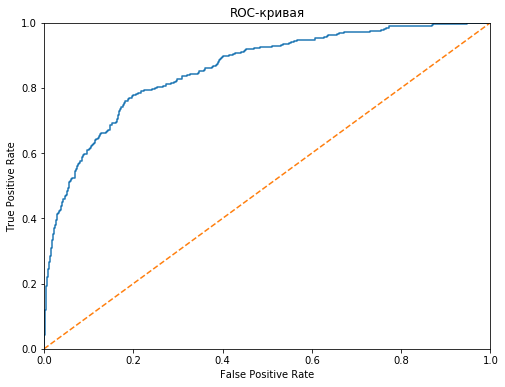

In [28]:
# Построим ROC-кривую для модели
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

In [29]:
# Посчитаем значение метрики AUC-ROC 
auc_roc = roc_auc_score(target_test, probabilities_one_test)
auc_roc

0.8570986966906542

In [30]:
# выведем значения других метрик
print(classification_report(target_test, predicted_test))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1463
           1       0.58      0.63      0.60       356

    accuracy                           0.84      1819
   macro avg       0.74      0.76      0.75      1819
weighted avg       0.84      0.84      0.84      1819



In [31]:
confusion_matrix(target_test, predicted_test)

array([[1298,  165],
       [ 131,  225]])

In [32]:
fi = pd.DataFrame({'Параметр': features_upsampled.columns, 'Вес_параметра': model.feature_importances_})
fi.sort_values(by='Вес_параметра', ascending=False)

,Параметр,Вес_параметра
1,age,0.328575
4,numofproducts,0.213655
3,balance,0.118389
7,estimatedsalary,0.076535
0,creditscore,0.072652
6,isactivemember,0.058455
8,geography_Germany,0.050082
2,tenure,0.040282
10,gender_Male,0.022665
5,hascrcard,0.009575


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
ОК, хорошо. Здесь ещё так можно: параметры модели подобраны на валидационной выборке и уже известны нам. Теперь можгно объединить трайн+валид для обучения и проверять на тесте. А параметры использовать подобранные. 

## Catboost (дополнительно) <a class = "tocSkip">

In [33]:
cat_features = [0, 1]
train_data = [["a", "b", 1, 4, 5, 6],
              ["a", "b", 4, 5, 6, 7],
              ["c", "d", 30, 40, 50, 60]]
train_labels = [1, 1, -1]
eval_data = [["a", "b", 2, 4, 6, 8],
             ["a", "d", 1, 4, 50, 60]]


model = CatBoostClassifier(iterations=2,
                           learning_rate=1,
                           depth=2)
model.fit(train_data, train_labels, cat_features)
preds_class = model.predict(eval_data)
preds_proba = model.predict_proba(eval_data)
preds_raw = model.predict(eval_data, prediction_type='RawFormulaVal')

0:	learn: 0.5800330	total: 47.9ms	remaining: 47.9ms
1:	learn: 0.4935379	total: 48.1ms	remaining: 0us


In [34]:
df2.dtypes

creditscore          int64
geography           object
gender              object
age                  int64
tenure             float64
balance            float64
numofproducts        int64
hascrcard            int64
isactivemember       int64
estimatedsalary    float64
exited               int64
dtype: object

In [35]:
model = CatBoostClassifier(verbose=100)
model.fit(features_train,target_train, eval_set = (features_test, target_test))
preds_class = model.predict(features_test)
preds_proba = model.predict_proba(features_test)
preds_one_proba = preds_proba[:, 1]
f1_score(target_test, preds_class), \
roc_auc_score(target_test, preds_one_proba)

Learning rate set to 0.093241
0:	learn: 0.6236513	test: 0.6228464	best: 0.6228464 (0)	total: 5.42ms	remaining: 5.42s
100:	learn: 0.2814428	test: 0.3262131	best: 0.3252351 (78)	total: 2.37s	remaining: 21.1s
200:	learn: 0.2347828	test: 0.3347299	best: 0.3252351 (78)	total: 4.82s	remaining: 19.2s
300:	learn: 0.2012378	test: 0.3423058	best: 0.3252351 (78)	total: 7.25s	remaining: 16.8s
400:	learn: 0.1719926	test: 0.3482466	best: 0.3252351 (78)	total: 9.79s	remaining: 14.6s
500:	learn: 0.1490501	test: 0.3552657	best: 0.3252351 (78)	total: 12.3s	remaining: 12.3s
600:	learn: 0.1317556	test: 0.3610372	best: 0.3252351 (78)	total: 14.9s	remaining: 9.93s
700:	learn: 0.1157040	test: 0.3678861	best: 0.3252351 (78)	total: 17.5s	remaining: 7.46s
800:	learn: 0.1017835	test: 0.3744264	best: 0.3252351 (78)	total: 19.9s	remaining: 4.95s
900:	learn: 0.0896193	test: 0.3819576	best: 0.3252351 (78)	total: 22.5s	remaining: 2.47s
999:	learn: 0.0786564	test: 0.3905824	best: 0.3252351 (78)	total: 25.1s	remaining:

(0.5673758865248226, 0.8678604068905664)

In [36]:
fi = pd.DataFrame({'Параметр': features_test.columns, 'Вес_параметра': model.feature_importances_})
fi.sort_values(by='Вес_параметра', ascending=False)

,Параметр,Вес_параметра
4,numofproducts,28.793552
1,age,22.489431
3,balance,12.746577
6,isactivemember,9.090211
8,geography_Germany,8.038932
0,creditscore,4.794687
7,estimatedsalary,4.437616
2,tenure,4.190158
10,gender_Male,3.813291
5,hascrcard,1.101973


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
И важность факторов выводишь - отлично.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u>
<font color='green'><br>Привет, Кирилл. С доработками - ОК. Также постарался ответить на твои вопросы.<br>
Спасибо за проект) УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБУЧЕНИЯ!

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>
<br/> Кирилл, добротная и качественная работа! <br>
Подготовка данных, разносторонняя работа с диссбалансом и исследование моделей и поиск парамтров для них - ничего не забыто <br>
И видно, что проделана рабочая аналитическая работа: результативно и с выводами. Особо отмечу то, что есть анализ важности факторов.<br> <br>

<font color='green'>
Если говорить, что можно ещё улучшить в подобных проектах, то я бы выделили такие моменты:<br>
1) После подбора параметров модели, когда уже настаёт этап тестировани. Можно обучить на обобщённой выборке (трайн + валидация) ну и тестировать потом. Это может ещё прибавить точности.(если не использовать кросс-валидации)<br>
    
2) Наверное ты в курсе, просто хочу напомнить: F1 и AUC - отличные метрики, но нужно держать в голове, что это лишь бобщённые характеристики. А в реальной практике бизнесу часто важно знать детали самой ошибки - из каких ошибок/успехов она складывается. И в этом случае очень кстати будут меры полноты и точности. Рассмотри возможность их использования для своих проектов. Только через них можно выйти на финансовые возможности модели. Ведь перед запуском её в бой, будет сравнение стоимости создания и поддержки модели со стомостью "оставить как есть" <br>   
    
<br><br>
УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБУЧЕНИЯ!

<font color='red'>
Что ещё лучше сделать в этой работе:<br>
1) посмотри ещё про ohe-категризацию, пожалуйста. Там надо избавляться от лишних фактров.<br>
<font color='green'>    
    
<br><br>
Спасибо) БУДУ ЖДАТЬ КОММЕНТАРИЕВ!

## Вывод

В результате выполнения проекта построили модель предсказания оттока клиентов из "Бета-Банка":
1. столбцы данных с категориальными признаками были преобразованы в числовые при помощи техники OHE;
2. все численные признаки были стандартизированы;
3. сравнили модели на основе логистической регрессии и случайного леса, лучший результат показала модель **Случайного леса**;
4. проверили модели на адекватность: разработанная модель оказалась лучше случайной; 
5. применили несколько способов борьбы с дисбалансом: взвешивание классов, апсемлинг и даунсемлинг, лучший результат показал **апсэмплинг** - удалось получить значение метрики `f1-score - 0.6161`.
6. в результате осуществили проверку модели на тестовой выборке, получили следующие значения метрик: `f1-score - 0.6032`, `auc-roc - 0.8502`, `precision - 0.58`, `recall - 0.63`   
Заявленные цель и задачи проекта достигнуты. Построенная модель с высокой долью вероятности определяет положительные значения (отток клиента).  
Дополнительно построили модель прогнозирования на основе Catboost, получили следующие метрики: `f1-score - 0.5673`, `auc-roc - 0.8678`

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*